###### Image Classification:
In this project, you'll classify images from the CIFAR-10 dataset. The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded. You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers. At the end, you'll get to see your neural network's predictions on the sample images.


Get the Data:
Run the following cell to download the CIFAR-10 dataset for python.

Data:
CIFAR-10 is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

Explore the Data:
The dataset is broken into batches to prevent your machine from running out of memory. The CIFAR-10 dataset consists of 5 batches, named data_batch_1, data_batch_2, etc.. Each batch contains the labels and images that are one of the following:

###### CIFAR-10 Task – Object Recognition in Images
CIFAR-10 is an established computer-vision dataset used for object recognition. The CIFAR-10 data consists of 60,000 (32×32) color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. The label classes in the dataset are:

airplane  
automobile  
bird  
cat  
deer  
dog  
frog  
horse  
ship  
truck   
The classes are completely mutually exclusive. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. Let us visualize few of the images of test

In [ ]:
import warnings
warnings.filterwarnings('ignore')

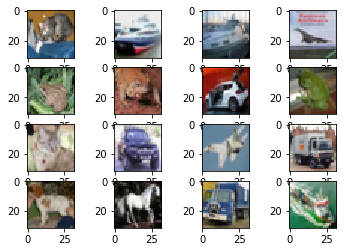

In [36]:
from matplotlib import pyplot
from scipy.misc import toimage
from keras.datasets import cifar10
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_imgs(x_test[:16])

###### Data Augmentation

In Keras, We have a ImageDataGenerator class that is used to generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches) indefinitely. The image data is generated by transforming the actual training images by rotation, crop, shifts, shear, zoom, flip, reflection, normalization etc. The below code snippets shows how to initialize the image data generator class.



In [6]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
datagen.fit(x_train)

To know more about all the possible arguments (transformations) and methods of this class, refer to Keras documentation here. For example, one can use flow(x, y) method that takes numpy data & label arrays, and generates batches of augmented/normalized data. It yields batches indefinitely, in an infinite loop. Below is the  snippet for visualizing the images generated using flow method of ImageDataGenerator class.

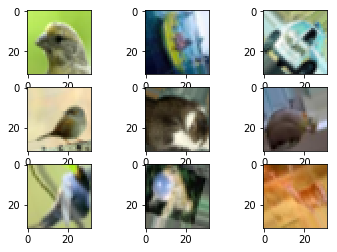

In [9]:
from matplotlib import pyplot as plt
# Configure batch size and retrieve one batch of images
img_rows, img_cols = 32, 32
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(toimage(X_batch[i].reshape(img_rows, img_cols, 3)))
    # show the plot
    plt.show()
    break


###### Regularization

Deep neural nets with a large number of parameters are very powerful machine learning systems. However, overfitting is a serious problem in such networks.  Given below are few techniques which were proposed recently and has become a general norm these days in convolutional neural networks.

Dropout is a technique for addressing this problem. The key idea is to randomly drop units (along with their connections) from the neural network during training. The reduction in number of parameters in each step of training has effect of regularization. Dropout has shown improvements in the performance of neural networks on supervised learning tasks in vision, speech recognition, document classification and computational biology, obtaining state-of-the-art results on many benchmark data sets [1].

Kernel_regularizer  allows to apply penalties on layer parameters during optimization. These penalties are incorporated in the loss function that the network optimizes. This argument in convolutional layer  is nothing but L2 regularisation of the weights. This penalizes peaky weights and makes sure that all the inputs are considered. During gradient descent parameter update, the above L2 regularization ultimately means that every weight is decayed linearly, that’s why called weight decay.

BatchNormalization normalizes the activation of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. It addresses the problem of internal covariate shift. It also acts as a regularizer, in some cases eliminating the need for Dropout. Batch Normalization achieves the same accuracy with fewer training steps thus speeding up the training process [2].

In [26]:
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
from sklearn.model_selection import train_test_split
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate
 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)


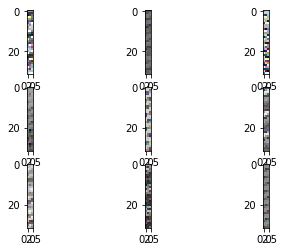

In [24]:
from matplotlib import pyplot
from PIL import Image
from keras import backend as K
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(Image.fromarray(np.rollaxis(X_train[i],0,3),'RGB'))
    
## show the plot
pyplot.show()

K.set_image_dim_ordering('th')
seed = 7
np.random.seed(seed)

In [27]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)
num_classes = y_test.shape[1]
print(X_train.shape)

(45000, 3, 32, 32)


In [32]:

import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import SGD
from keras.constraints import maxnorm
#Create the model now
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (3,32,32), padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

epochs = 25 
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 8, 8)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
__________

In [33]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test,y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 242s 5ms/step - loss: 1.6638 - acc: 0.3962 - val_loss: 1.4158 - val_acc: 0.4906
Epoch 2/25
45000/45000 [==============================] - 230s 5ms/step - loss: 1.2534 - acc: 0.5504 - val_loss: 1.1676 - val_acc: 0.5804
Epoch 3/25
45000/45000 [==============================] - 226s 5ms/step - loss: 1.0538 - acc: 0.6259 - val_loss: 0.9931 - val_acc: 0.6516
Epoch 4/25
45000/45000 [==============================] - 490s 11ms/step - loss: 0.9113 - acc: 0.6769 - val_loss: 0.9734 - val_acc: 0.6594
Epoch 5/25
45000/45000 [==============================] - 229s 5ms/step - loss: 0.8090 - acc: 0.7150 - val_loss: 0.9363 - val_acc: 0.6798
Epoch 6/25
45000/45000 [==============================] - 227s 5ms/step - loss: 0.7149 - acc: 0.7489 - val_loss: 0.8937 - val_acc: 0.6930
Epoch 7/25
45000/45000 [==============================] - 659s 15ms/step - loss: 0.6429 - acc: 0.7738 - val_loss: 0.8387 -

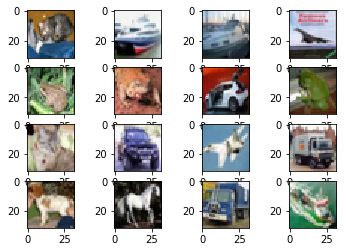

['cat', 'automobile', 'automobile', 'automobile', 'frog', 'frog', 'automobile', 'frog', 'dog', 'automobile', 'airplane', 'truck', 'automobile', 'horse', 'truck', 'ship']


In [42]:
# mean-std normalization
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
 
show_imgs(X_test[:16])

# Load trained CNN model

 
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(X_test[:16]),1)
print( [labels[X] for X in indices])


In [43]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)